# Preprocessing SNP array data - step1

## Load library

In [1]:
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))

## Prepare files for QC with PLINK

In [2]:
# Load Gentrain Scores (GenomeStudio Quality Scores)
Gentrain_GSE141901         <- fread("data/Gentrain_GSE141901.txt")
Gentrain_GSE248483         <- fread("data/Gentrain_GSE248483.txt")
Gentrain_GSE69664_GPL19864 <- fread("data/Gentrain_GSE69664_GPL19864.txt")
Gentrain_GSE69664_GPL20166 <- fread("data/Gentrain_GSE69664_GPL20166.txt")
Gentrain_GSE74100          <- fread("data/Gentrain_GSE74100.txt")

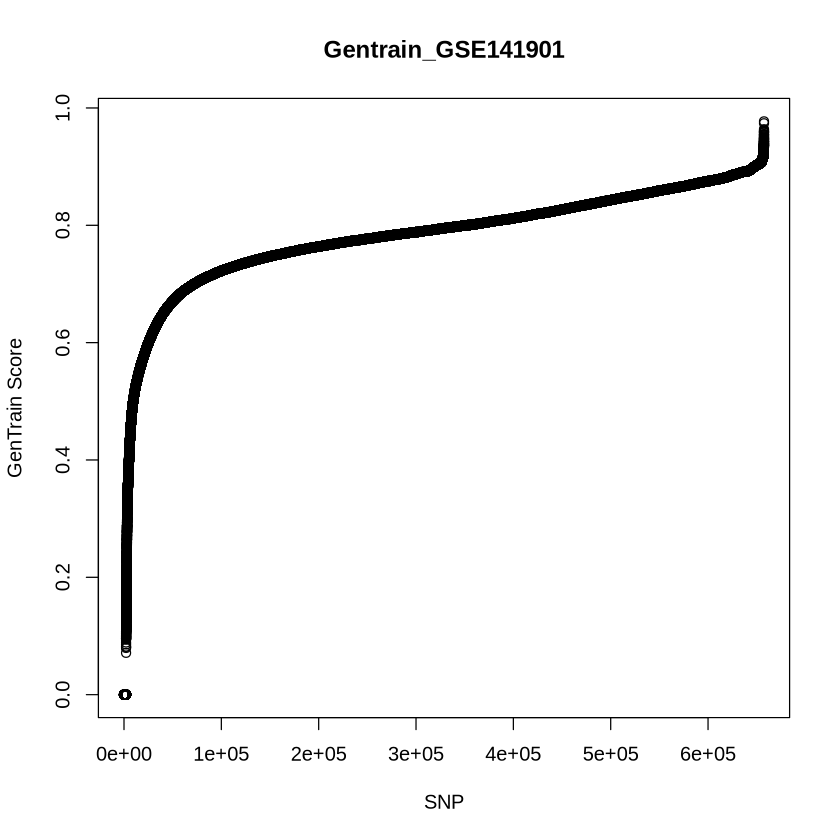

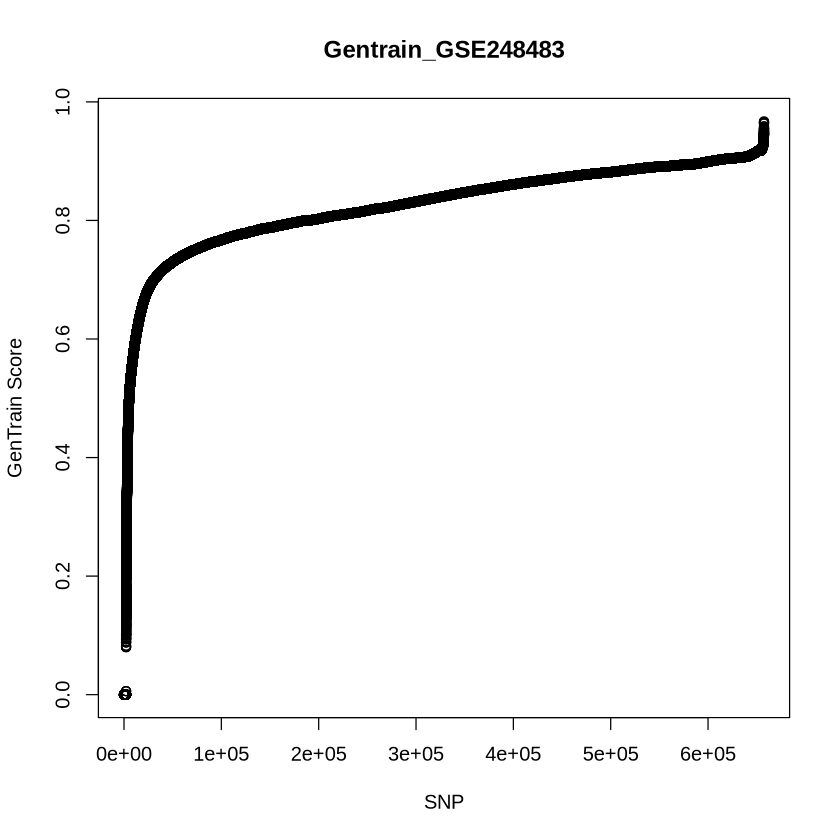

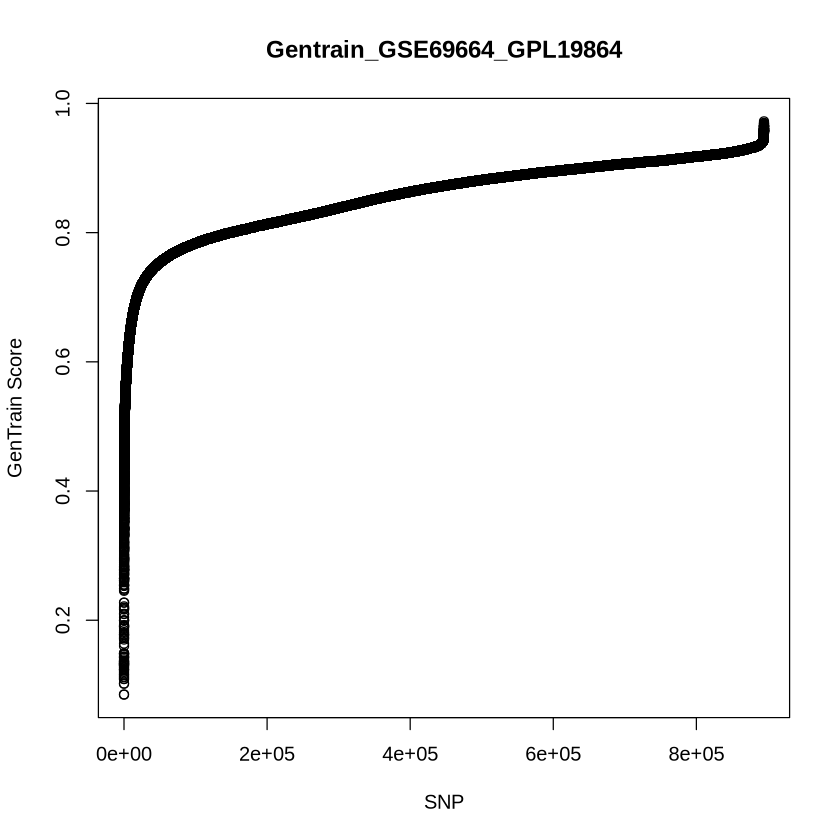

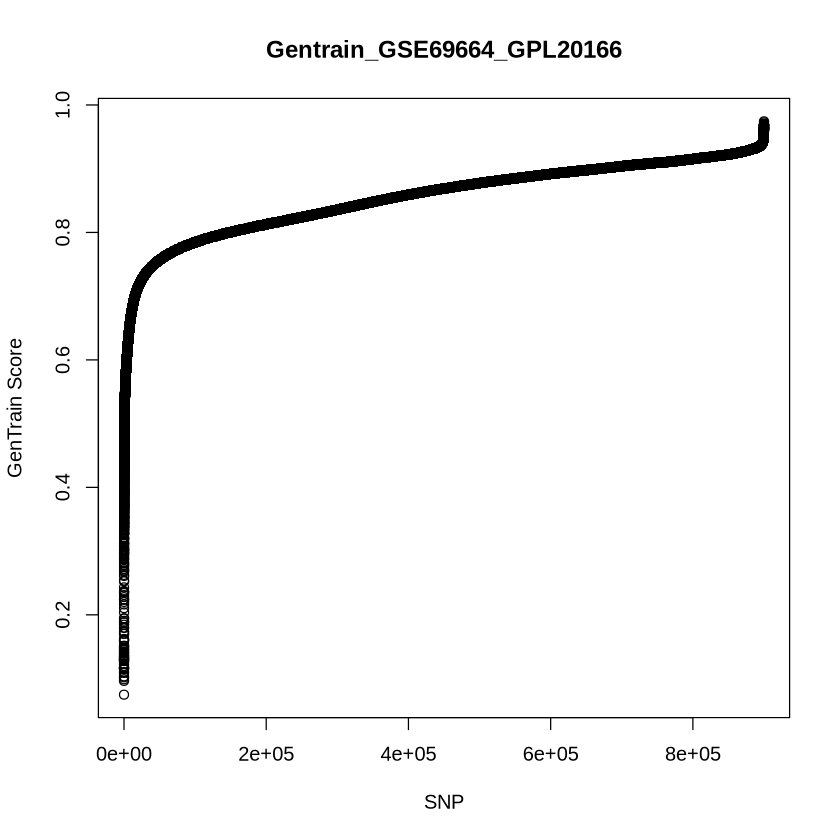

integer(0)

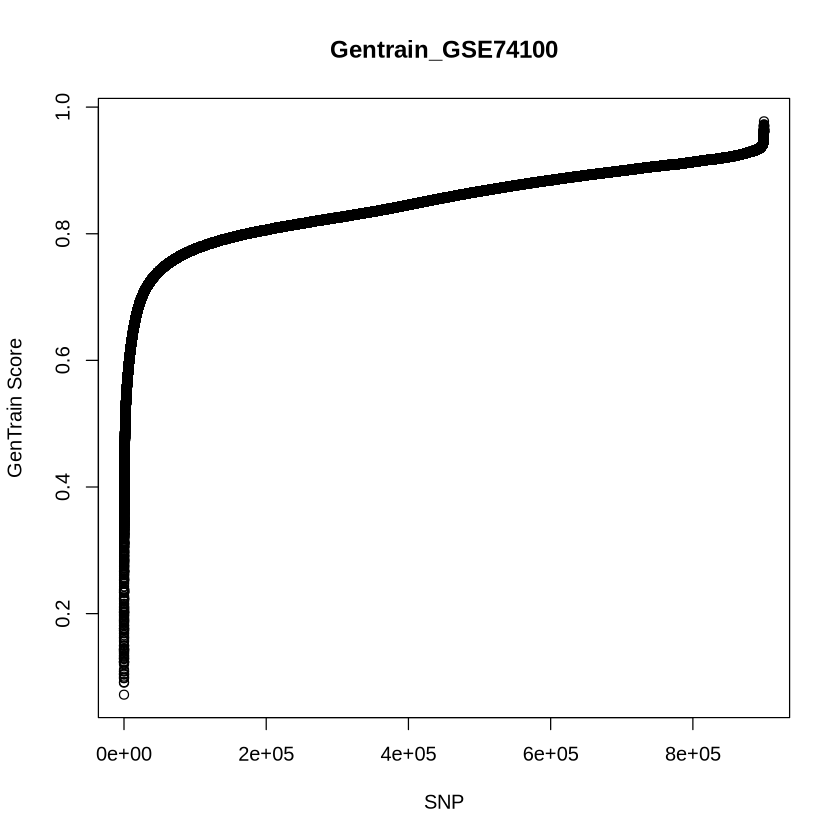

In [3]:
# Plot gentrain score distributions
tmp1 <- Gentrain_GSE141901[order(Gentrain_GSE141901$"GenTrain Score"),]
p1 <- plot(x = 1:nrow(tmp1), y = tmp1$"GenTrain Score", main = "Gentrain_GSE141901", xlab="SNP",ylab="GenTrain Score")

tmp2 <- Gentrain_GSE248483[order(Gentrain_GSE248483$"GenTrain Score"),]
p2 <- plot(x = 1:nrow(tmp2), y = tmp2$"GenTrain Score", main = "Gentrain_GSE248483", xlab="SNP",ylab="GenTrain Score")

tmp3 <- Gentrain_GSE69664_GPL19864[order(Gentrain_GSE69664_GPL19864$"GenTrain Score"),]
p3 <- plot(x = 1:nrow(tmp3), y = tmp3$"GenTrain Score", main = "Gentrain_GSE69664_GPL19864", xlab="SNP",ylab="GenTrain Score")

tmp4 <- Gentrain_GSE69664_GPL20166[order(Gentrain_GSE69664_GPL20166$"GenTrain Score"),]
p4 <- plot(x = 1:nrow(tmp4), y = tmp4$"GenTrain Score", main = "Gentrain_GSE69664_GPL20166", xlab="SNP",ylab="GenTrain Score")

tmp5 <- Gentrain_GSE74100[order(Gentrain_GSE74100$"GenTrain Score"),]
p5 <- plot(x = 1:nrow(tmp5), y = tmp5$"GenTrain Score", main = "Gentrain_GSE74100", xlab="SNP",ylab="GenTrain Score")

p1 + p2 + p3 + p4 + p5

In [4]:
# Export low-quality SNPs for PLINK exclusion (GenTrain cutoff = 0.7)

Gentrain_GSE141901[Gentrain_GSE141901$"GenTrain Score" < 0.7]                 %>% select(Name) %>% write_delim(file = "data/Gentrain_GSE141901_Excluder.txt", delim = "\t", quote = "none", col_names = FALSE)
Gentrain_GSE248483[Gentrain_GSE248483$"GenTrain Score" < 0.7]                 %>% select(Name) %>% write_delim(file = "data/Gentrain_GSE248483_Excluder.txt", delim = "\t", quote = "none", col_names = FALSE)
Gentrain_GSE69664_GPL19864[Gentrain_GSE69664_GPL19864$"GenTrain Score" < 0.7] %>% select(Name) %>% write_delim(file = "data/Gentrain_GSE69664_GPL19864_Excluder.txt", delim = "\t", quote = "none", col_names = FALSE)
Gentrain_GSE69664_GPL20166[Gentrain_GSE69664_GPL20166$"GenTrain Score" < 0.7] %>% select(Name) %>% write_delim(file = "data/Gentrain_GSE69664_GPL20166_Excluder.txt", delim = "\t", quote = "none", col_names = FALSE)
Gentrain_GSE74100[Gentrain_GSE74100$"GenTrain Score" < 0.7]                   %>% select(Name) %>% write_delim(file = "data/Gentrain_GSE74100_Excluder.txt", delim = "\t", quote = "none", col_names = FALSE)

## Prepare files for updating SNP RSID (Convert GEO ID to RSID)

In [5]:
# Array Platform: Asian screening array
# Source: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL27900

id_table <- fread("data/SNPID_AsianScreeningArray.txt")
id_table$ID <- gsub(";FWD", "", id_table$ID)

#replace . with original id
#select column needed (old -> new)
#plink: the new value is read from column 2 and the (old) variant ID from column 1

id_table %>% mutate(SNP_ID = ifelse(SNP_ID == ".", ID, SNP_ID)) %>% select(ID, SNP_ID) %>%
    write_delim(file = "data/SNPID_AsianScreeningArray_OldnNew.txt", delim = "\t", quote = "none", col_names = FALSE)

In [6]:
# Array Platform: HumanOmniZhongHua
# Srouce: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL19864

omni_zhonghua_id_table <- fread("data/SNPID_HumanOmniZhonghua.txt")

#replace NA with original id
#select column needed (old -> new)
#plink: the new value is read from column 2 and the (old) variant ID from column 1

omni_zhonghua_id_table %>% select(SPOT_ID, SNP_ID) %>% mutate(SNP_ID = ifelse(SNP_ID == "", SPOT_ID, SNP_ID)) %>%
    write_delim(file = "data/SNPID_HumanOmniZhonghua_OldnNew.txt", delim = "\t", quote = "none", col_names = FALSE)